In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

In [26]:
x_train = torch.tensor([[0,0], [1,0], [0,1], [1,1]], dtype=torch.float)
y_train = torch.tensor([[1], [1], [1], [0]], dtype=torch.float)

# print(x_train)
# print(y_train)

In [27]:
class NandOperatorNN:
	def __init__(self):
		self.W = torch.tensor([[1.0], [3.0]], requires_grad=True)
		self.b = torch.tensor([2.5], requires_grad=True)
	
	def logits(self, x):
		return x @ self.W + self.b
	
	def f(self, x):
		return torch.sigmoid(x @ self.W + self.b)

	def loss(self, x, y):
		return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)
		# return -torch.mean(torch.multiply(y, torch.log(self.f(x))) + torch.multiply((1-y), torch.log(1 - self.f(x))))

In [28]:
model = NandOperatorNN()
optimizer = torch.optim.SGD([model.W, model.b], lr=10)

In [29]:
for epoch in range(10000):
	model.loss(x_train, y_train).backward()
	optimizer.step()
	optimizer.zero_grad()

In [30]:
print(f'W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}')

W = tensor([[-10.6795],
        [-10.6795]], requires_grad=True), b = tensor([16.1883], requires_grad=True), loss = 0.0034375451505184174


tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.5725e-01, 9.5138e-01,
         9.4474e-01],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.5138e-01, 9.4474e-01,
         9.3727e-01],
        [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 9.4474e-01, 9.3727e-01,
         9.2886e-01],
        ...,
        [9.5725e-01, 9.5138e-01, 9.4474e-01,  ..., 4.6732e-05, 4.0837e-05,
         3.5686e-05],
        [9.5138e-01, 9.4474e-01, 9.3727e-01,  ..., 4.0837e-05, 3.5686e-05,
         3.1184e-05],
        [9.4474e-01, 9.3727e-01, 9.2886e-01,  ..., 3.5686e-05, 3.1184e-05,
         2.7251e-05]])


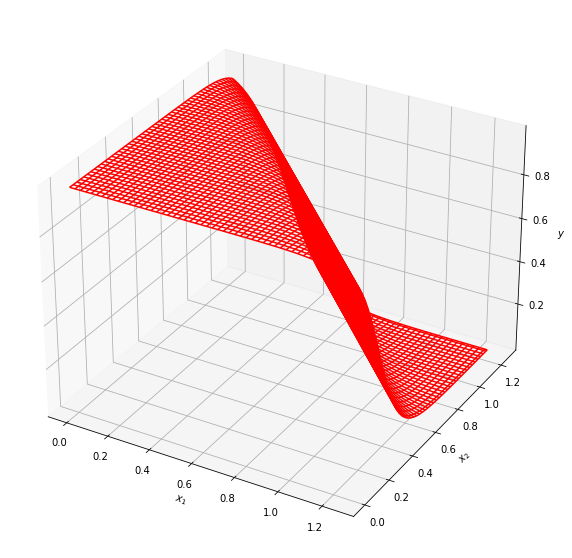

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

x1, x2 = torch.meshgrid(torch.linspace(0, 1.25, 100), torch.linspace(0, 1.25, 100))

y_grid = torch.empty([100,100])

for i in range(100):
	for j in range(100):
		x = torch.tensor([[x1[i,j], x2[i,j]]])
		y_grid[i,j] = model.f(x).item()

# x = torch.column_stack((x1, x2))
print(y_grid)
ax.plot_wireframe(x1,x2,y_grid, color='red')

